# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(1판) 교재의 소스 코드**
## *8장 다중회귀와 분류*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 8.3 기대수명 데이터 둘러보기

In [ ]:
import pandas as pd  

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'

life = pd.read_csv(file)
print(life.head(3))

       Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9

[3 rows x 22 columns]


In [ ]:
print('기대수명 데이터의 개요:')
print(life.describe())

기대수명 데이터의 개요:
              Year  ...    Schooling
count  2938.000000  ...  2775.000000
mean   2007.518720  ...    11.992793
std       4.613841  ...     3.358920
min    2000.000000  ...     0.000000
25%    2004.000000  ...    10.100000
50%    2008.000000  ...    12.300000
75%    2012.000000  ...    14.300000
max    2015.000000  ...    20.700000

[8 rows x 20 columns]


In [ ]:
print('life 데이터의 컬럼들')
print(life.columns)

life 데이터의 컬럼들
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


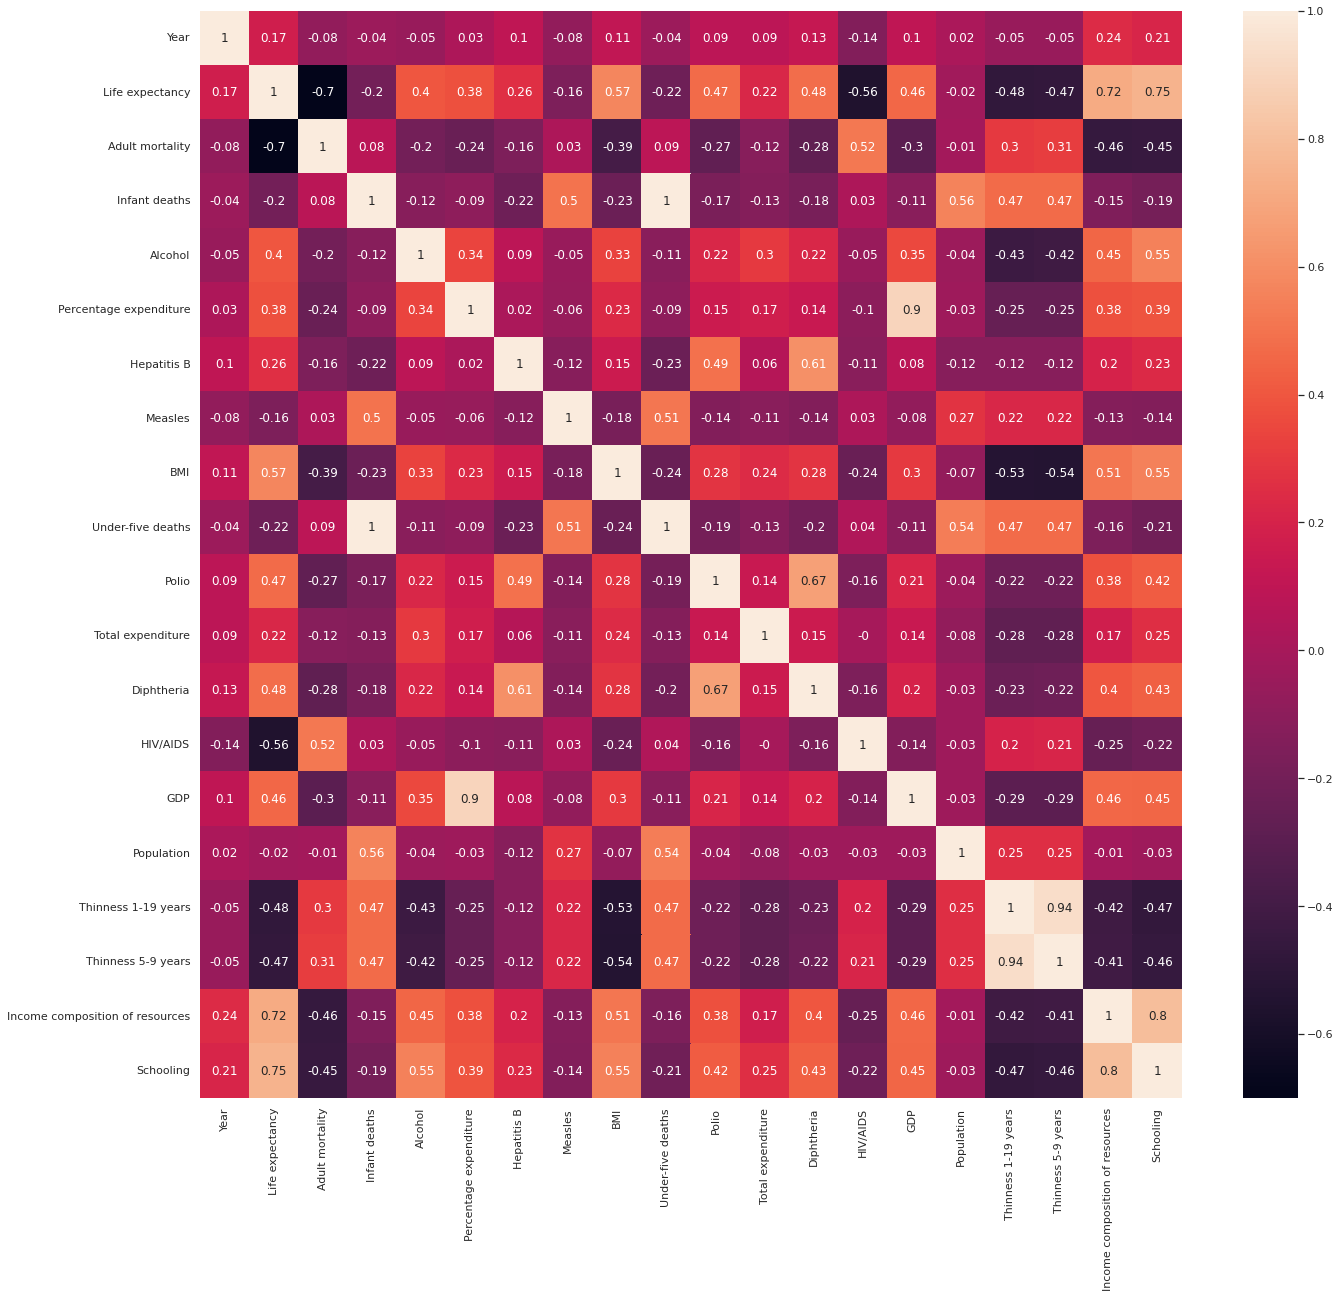

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시본 라이버러리의 크기를 지정
sns.set(rc={'figure.figsize':(22,20)})
correlation_matrix = life.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)  

### 8.4 기대수명과 상관도가 높은 데이터는 무엇인가

In [ ]:
print("기대수명과의 상관계수")
print(life.corr().round(3)['Life expectancy'])

기대수명과의 상관계수
Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


In [ ]:
import numpy as np

# 'Life expectancy'와 다른 속성들의 소수점 둘째 자리 상관계수를 구함
c = life.corr().round(2)['Life expectancy']
c = np.abs(c)       # 상관계수의 절대값을 취한다
print(c.sort_values(ascending=False)[1:8]) # 상위 7개 값을 출력하자

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Name: Life expectancy, dtype: float64


In [ ]:
print('Life expectancy와 상관도 순서로 정렬 후 하위 5개 값')
print(c.sort_values(ascending=False)[-6:-1]) # 하위 5개 슬라이싱 

Life expectancy와 상관도 순서로 정렬 후 하위 5개 값
Under-five deaths    0.22
Total expenditure    0.22
Infant deaths        0.20
Year                 0.17
Measles              0.16
Name: Life expectancy, dtype: float64


### 8.5 기대수명과 특성 분석

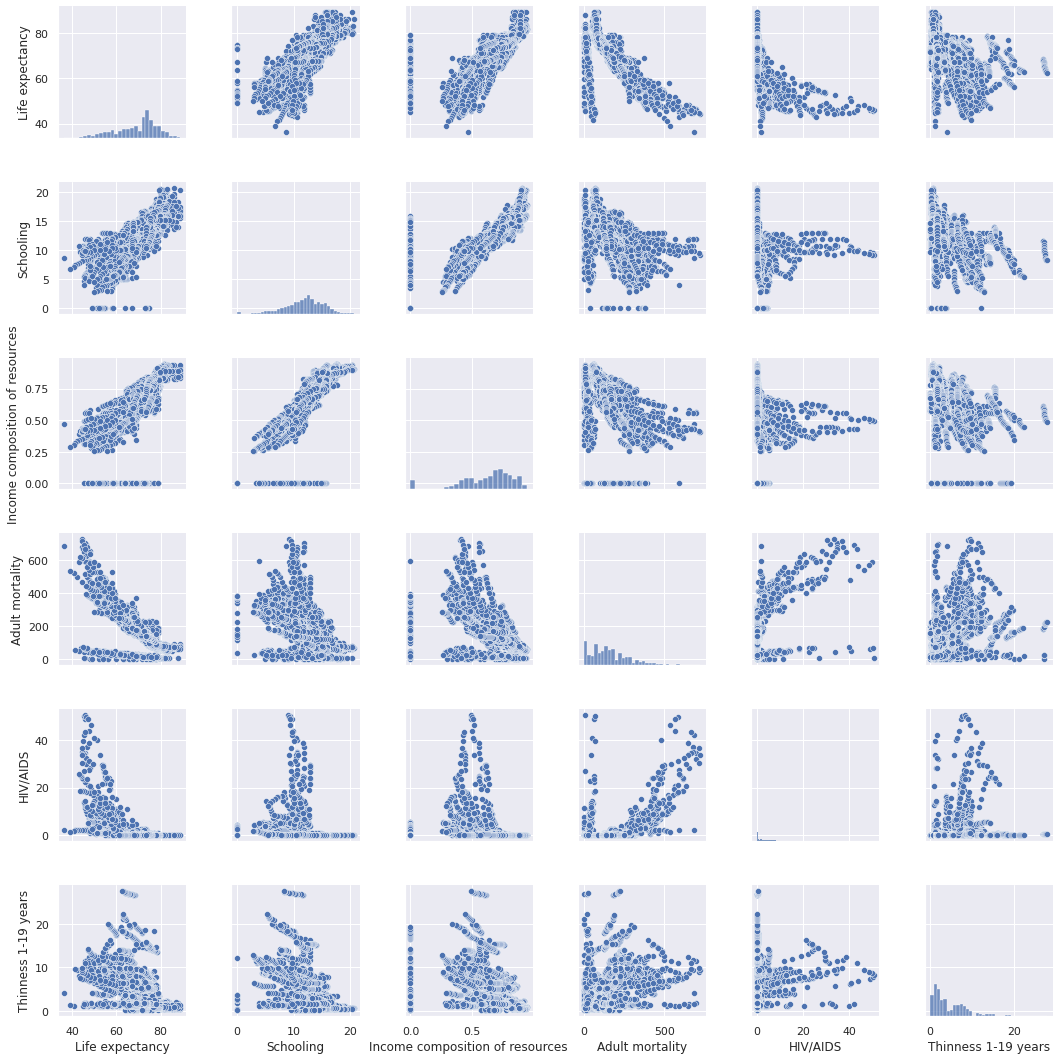

In [ ]:
sns.pairplot(life[['Life expectancy', 'Schooling',\
                   'Income composition of resources',\
                   'Adult mortality', 'HIV/AIDS',\
                   'Thinness 1-19 years']])
plt.show()

In [ ]:
life[['Schooling', 'Income composition of resources',\
      'Adult mortality', 'HIV/AIDS',\
      'Thinness 1-19 years']].isna().sum()

Schooling                          163
Income composition of resources    167
Adult mortality                     10
HIV/AIDS                             0
Thinness 1-19 years                 34
dtype: int64

In [ ]:
life.dropna(inplace=True) # 결측값 제거

X = life[['Schooling', 'Income composition of resources',\
          'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                   test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형회귀 모델의 점수=', regr.score(X_test, y_test).round(3))

선형회귀 모델의 점수= 0.842


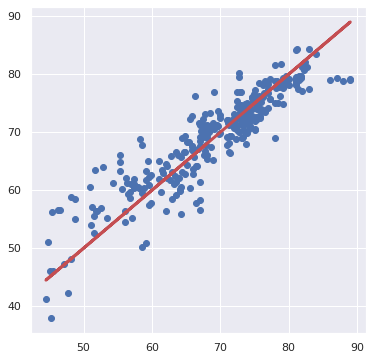

In [ ]:
plt.figure(figsize=(6,6))
y_test_predict = regr.predict(X_test)
plt.scatter(y_test, y_test_predict)
plt.plot(y_test, y_test, color='r', linewidth=3)

### 훈련 데이터, 검증 데이터 그리고 특성

In [ ]:
import pandas as pd  

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'
life = pd.read_csv(file)

life.dropna(inplace=True) # 결측값 제거
# 'Country', 'Year', 'Status', 'Life expectancy'를 제외한 속성 사용
X = life[['Year','Adult mortality','Infant deaths', 'Alcohol',\
          'Percentage expenditure','Hepatitis B', 'Measles',\
          'BMI', 'Under-five deaths', 'Polio',\
          'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP',\
          'Population','Thinness 1-19 years','Thinness 5-9 years',\
          'Income composition of resources', 'Schooling']]
y = life['Life expectancy']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                   test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형회귀 모델의 점수 =', regr.score(X_test, y_test).round(3))

선형회귀 모델의 점수 = 0.852


### LAB 8-1 : 상관도를 시각화하여 중요 특성을 분석하자.

Text(0, 0.5, 'Correlation Coef')

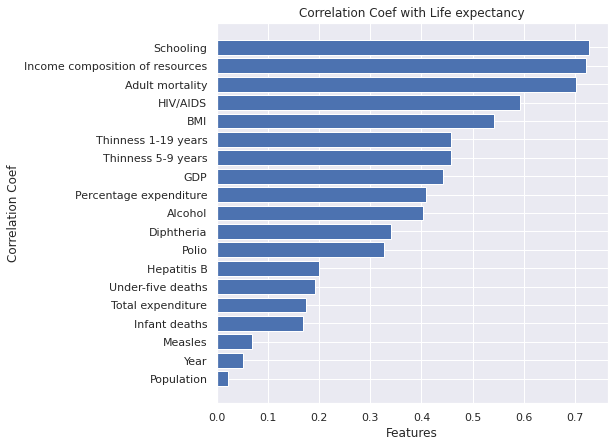

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'

life = pd.read_csv(file)
life.dropna(inplace=True) # 결측값 제거
# 'Country', 'Status', 'Life expectancy'를 제외한 속성 사용
X = life[['Year','Adult mortality','Infant deaths', 'Alcohol',\
          'Percentage expenditure','Hepatitis B', 'Measles',\
          'BMI', 'Under-five deaths', 'Polio',\
          'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP',\
          'Population','Thinness 1-19 years','Thinness 5-9 years',\
          'Income composition of resources', 'Schooling']]

# 'Life expectancy'와 다른 속성들의 상관계수를 구함
c = life.corr()['Life expectancy']
c = np.abs(c)       # 상관계수의 절대값을 취한다
c.sort_values(ascending=True, inplace=True)
c = c[:-1] # Life expectancy는 제거
plt.figure(figsize=(7,7))
plt.barh(c.index, c.values)
plt.title('Correlation Coef with Life expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation Coef')

### 8.7 데이터의 분포가 직선이 아니라면? 다항 회귀 모델을 사용하자

#### 다항회귀 테스트를 위하여 2차 방정식으로 비선형 데이터를 임의로 만들

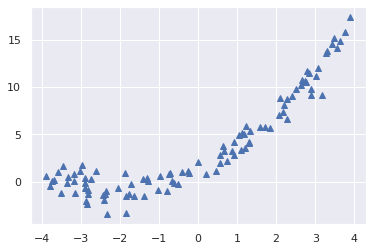

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 100    # 생성할 데이터의 갯수
# 평균값이 0이고 -4에서 4사이에 분포하는 랜덤 값 X
X = 8 * np.random.rand(m, 1) - 4 
# x^2항의 계수가 0.5, x항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m, 1)

plt.figure(figsize=(6,4))
plt.plot(X, y, "b^")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regr = LinearRegression()
regr.fit(X, y)
print('선형회귀 모델의 점수 =', regr.score(X, y).round(3))
print('선형회귀 모델의 계수와 절편 =', regr.coef_, regr.intercept_)

선형회귀 모델의 점수 = 0.787
선형회귀 모델의 계수와 절편 = [[1.92730706]] [3.91608126]


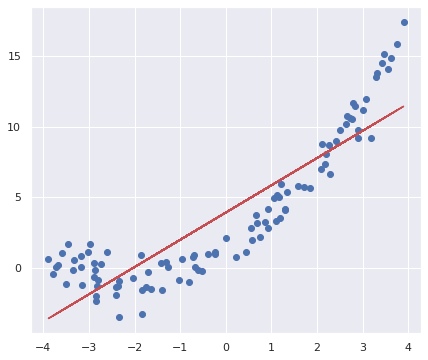

In [ ]:
plt.figure(figsize=(7,6))
y_predict = regr.predict(X)
plt.scatter(X, y)
plt.plot(X.flatten(), y_predict, color='r')

### 8.8 다항 회귀 모델을 사용하자

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(2).reshape(-1, 1)
print(X)

[[0]
 [1]]


In [ ]:
poly = PolynomialFeatures()
X = poly.fit_transform(X)
print(X)

[[1. 0. 0.]
 [1. 1. 1.]]


In [ ]:
print(poly.get_feature_names())

['1', 'x0', 'x0^2']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

m = 100    # 생성할 데이터의 갯수
# 평균값이 0이고 -4에서 4사이에 분포하는 랜덤 값 X
X = 8 * np.random.rand(m, 1) - 4 
# x^2항의 계수가 0.5, x항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree = 2,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X)
regr = LinearRegression()
regr.fit(X_poly, y)
print('다항 회귀 모델의 점수 =', regr.score(X_poly, y).round(3))
print('다항 회귀 모델의 계수 =', regr.coef_, '절편 =', regr.intercept_)

다항 회귀 모델의 점수 = 0.969
다항 회귀 모델의 계수 = [[1.8946211  0.52582066]] 절편 = [0.91065702]


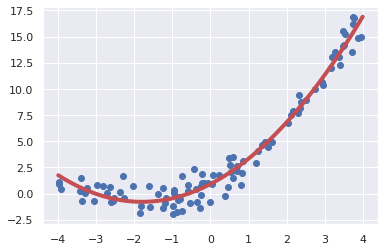

In [ ]:
# -4에서 4사이의 데이터를 생성하자.
domain = np.linspace(-4, 4, 50).reshape(-1, 1)
# domain 데이터에 2차 다항 특성을 추가한 domain_2를 만들자
domain_2 = poly_features.fit_transform(domain)
plt.figure(figsize=(6,4))
y_predict = regr.predict(domain_2)
plt.scatter(X, y)
plt.plot(domain, y_predict, color='r', linewidth=4)

### LAB 8-2 : 3차 방정식을 만들고 다항 회귀 모델을 이용하여 예측하기

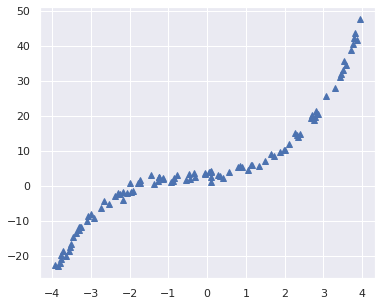

In [ ]:
# 2개의 변곡점을 가진 데이터를 생성하고 시각화하는 코드
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)
plt.figure(figsize=(6,5))
plt.plot(X, y, "b^")

다항 회귀 모델의 점수 = 0.996
다항 회귀 모델의 계수 = [[0.85377085 0.48743068 0.51253902]]
절편 = [3.0749965]


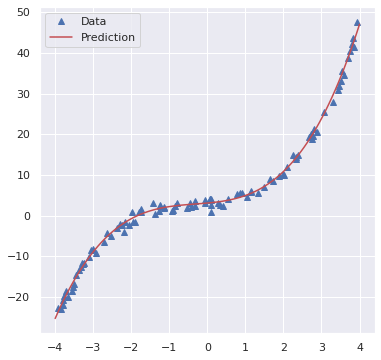

In [ ]:
# 다항 회귀 모델을 만들고 점수와 계수, 절편을 출력하는 코드
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree = 3,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X)
regr = LinearRegression()
regr.fit(X_poly, y)

print('다항 회귀 모델의 점수 =', regr.score(X_poly, y).round(3))
print('다항 회귀 모델의 계수 =', regr.coef_)
print('절편 =', regr.intercept_)

# 다항 회귀 곡선을 생성하는 기능 
X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

plt.figure(figsize=(6,6))
plt.plot(X, y, "b^", label='Data')
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.legend()

### 8.9 과대 적합에 주의하자

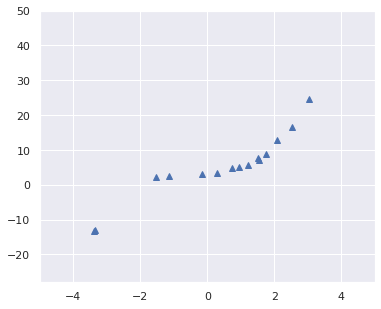

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 20개의 데이터를 생성하고 시각화 하는 기능
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

# 20개의 데이터를 학습용 데이터, 테스트 데이터로 구분하자
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.figure(figsize=(6,5))
plt.xlim(-5, 5); plt.ylim(-28, 50) # x, y 범위를 제한함
plt.plot(X_train, y_train, "b^") # 학습용 데이터를 그리자

In [ ]:
# 다항 회귀 모델을 만들고 점수와 계수, 절편을 출력
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 다항 특성이 20개가 되도록 하자
poly_features = PolynomialFeatures(degree = 20,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X_train)
regr = LinearRegression()
regr.fit(X_poly, y_train)

print('다항 회귀 모델의 점수 =', regr.score(X_poly, y_train).round(3))
print('다항 회귀 모델의 계수 =', regr.coef_)
print('절편 =', regr.intercept_)

다항 회귀 모델의 점수 = 1.0
다항 회귀 모델의 계수 = [[ 1.09722193e+00 -1.12892849e+01  1.73755164e+01  9.44040300e+00
   3.61987463e+00 -1.70183366e+01 -1.22816400e+01 -1.18880886e+01
   9.57879763e+00  1.56550391e+01  1.26230025e+01  1.76511858e+00
  -3.00793834e+01  4.34260213e+00  1.35779251e+01 -4.06102875e+00
  -1.66587132e+00  6.18087975e-01  6.05170836e-02 -2.62706693e-02]]
절편 = [3.43241281]


In [ ]:
# 테스트 데이터를 다항 회귀 모델의 입력으로 주고 예측 점수를 구해보자
X_poly = poly_features.fit_transform(X_test)

print('테스트 데이터에 대한 모델의 점수 =', regr.score(X_poly, y_test))

테스트 데이터에 대한 모델의 점수 = -848.8991589122721


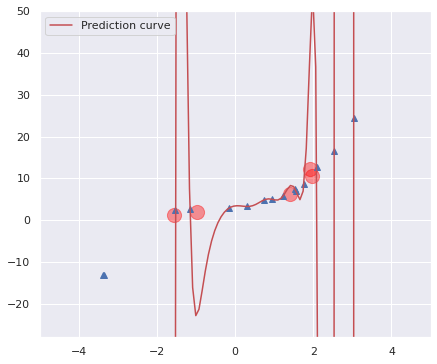

In [ ]:
# 다항 회귀 곡선을 생성하는 기능 
X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

plt.figure(figsize=(7,6))
plt.xlim(-5, 5); plt.ylim(-28, 50) # x, y 범위를 제한함

# 학습용 데이터와 다항 회귀 곡선을 그려보고 테스트 데이터도 그려보자
plt.plot(X_train, y_train, 'b^')
plt.scatter(X_test, y_test, c='red', s=200, alpha=0.4)
plt.plot(X_new, y_new, "r-", label="Prediction curve")
plt.legend()

### 8.11 최적화와 릿지 회귀

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 20개의 데이터를 생성하자
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

# 20개의 데이터를 학습용 데이터, 테스트 데이터로 구분하자
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 다항 특성이 20개가 되도록 하자
poly_features = PolynomialFeatures(degree = 20,\
                                   include_bias = False)
X_train_pl = poly_features.fit_transform(X_train)
X_test_pl = poly_features.fit_transform(X_test)

regr = LinearRegression()
regr.fit(X_train_pl, y_train)

print('훈련 데이터의 점수 =', regr.score(X_train_pl, y_train).round(3))
print('테스트 데이터의 점수 =', regr.score(X_test_pl, y_test).round(3))

훈련 데이터의 점수 = 1.0
테스트 데이터의 점수 = -170242558787583.2


### 8.12 릿지 회귀와 alpha 값

In [ ]:
### 규제를 추가해 보자 ##
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 규제가 있는 모델은 스케일러로 변환을 해야 함
ss.fit(X_train_pl)
train_scaled, test_scaled = ss.transform(X_train_pl),ss.transform(X_test_pl)
ss.fit(y_train)
y_train_scaled, y_test_scaled = ss.transform(y_train), ss.transform(y_test) 

### 릿지 회귀 ###
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train_scaled)
print('훈련 데이터의 점수 =', ridge.score(train_scaled, y_train_scaled))
print('테스트 데이터의 점수 =', ridge.score(test_scaled, y_test_scaled))

훈련 데이터의 점수 = 0.9642532722420287
테스트 데이터의 점수 = 0.7813586149403398


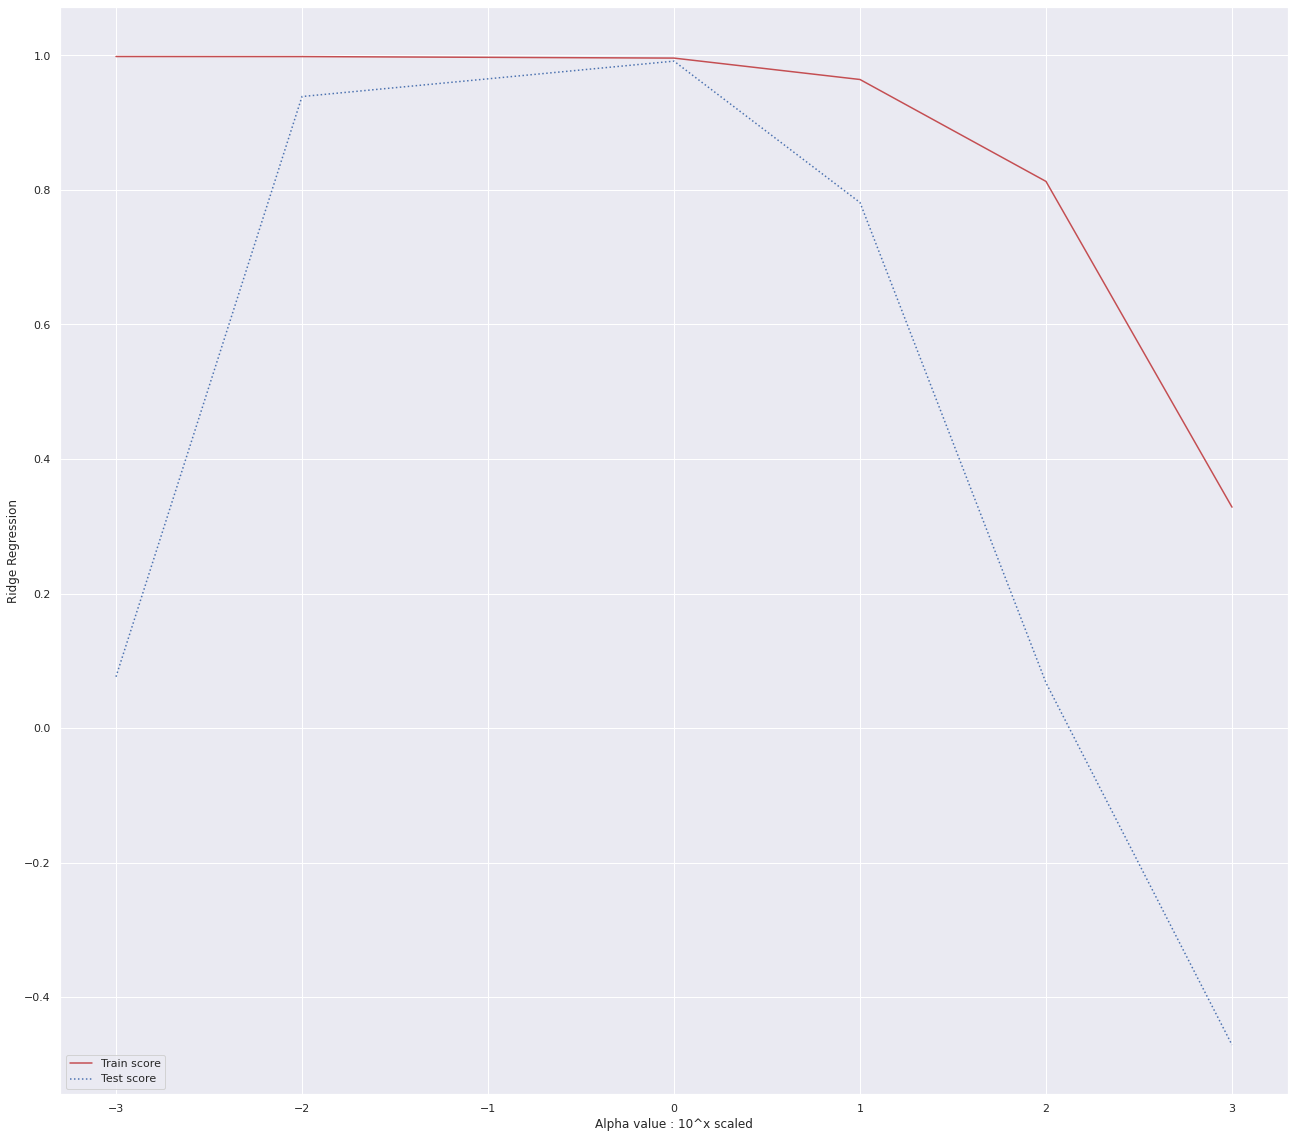

In [ ]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
alpha_values = [0.001, 0.01, 1, 10, 100, 1000]
for a in alpha_values:
  ridge = Ridge(alpha = a)
  ridge.fit(train_scaled, y_train_scaled)
  train_scores.append(ridge.score(train_scaled, y_train_scaled))
  test_scores.append(ridge.score(test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_values), train_scores, 'r-', label='Train score')
plt.plot(np.log10(alpha_values), test_scores, 'b:', label='Test score')
plt.xlabel('Alpha value : 10^x scaled')
plt.ylabel('Ridge Regression')
plt.legend(loc="lower left")

## 감사합니다